# Accuracy vs. faithfulness

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
from matplotlib.lines import Line2D
from pathlib import Path

In [2]:
plt.style.use('science')

In [3]:
date = "2023-03-14-22-37-07"
experiment = "hatexplain-lime-distilbert-2"

here_path = Path().absolute()
experiments_path = here_path.parent / "data" / "experiments"
experiment_path = experiments_path / date / experiment
results_path = experiment_path / "results.jsonl"

In [4]:
results = []
with open(results_path, 'r') as f:
    for line in f:
        results.append(json.loads(line))

In [5]:
all_results = sorted(results, key=lambda x: x['weight'])
weights = [result['weight'] for result in results]

In [6]:
weights = weights[1:]
all_results = all_results[1:]

In [7]:
def filter_results(results):
    """Filter the results.

    Remove the None and NaN values from the results.

    Args:
        results (list of float): Results to filter.
    
    Returns:
        list of float: Filtered results.
    """
    return [result for result in results \
        if result is not None and not np.isnan(result)]

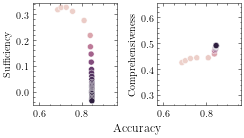

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(4, 2))

x = []
y = []
for results in all_results:
    x.append(results['performance']['accuracy'])
    y.append(
        - np.mean(
            filter_results(results['explainability']['sufficiency_aopc'])
        )
    )
sns.scatterplot(
    x="Accuracy",
    y="Sufficiency",
    data=pd.DataFrame({
        "Accuracy": x,
        "Sufficiency": y,
    }),
    hue=weights,
    ax=axes[0],
)
x_1 = x
y_1 = y

# x = []
# y = []
# for results in all_results:
#     x.append(results['performance']['accuracy'])
#     y.append(
#         np.mean(
#             filter_results(results['explainability']['random_sufficiency_aopc'])
#         )
#     )
# sns.scatterplot(
#     x="Accuracy",
#     y="Random sufficiency",
#     data=pd.DataFrame({
#         "Accuracy": x,
#         "Random sufficiency": y,
#     }),
#     ax=axes[0],
#     hue=weights,
#     palette=sns.color_palette("crest", as_cmap=True),
# )

x = []
y = []
for results in all_results:
    x.append(results['performance']['accuracy'])
    y.append(
        np.mean(
            filter_results(results['explainability']['comprehensiveness_aopc'])
        )
    )
sns.scatterplot(
    x="Accuracy",
    y="Comprehensiveness",
    data=pd.DataFrame({
        "Accuracy": x,
        "Comprehensiveness": y,
    }),
    hue=weights,
    ax=axes[1],
)
x_2 = x
y_2 = y

# x = []
# y = []
# for results in all_results:
#     x.append(results['performance']['accuracy'])
#     y.append(
#         np.mean(
#             filter_results(results['explainability']['random_comprehensiveness_aopc'])
#         )
#     )
# sns.scatterplot(
#     x="Accuracy",
#     y="Random comprehensiveness",
#     data=pd.DataFrame({
#         "Accuracy": x,
#         "Random comprehensiveness": y,
#     }),
#     ax=axes[1],
#     hue=weights,
#     palette=sns.color_palette("crest", as_cmap=True),
# )

axes[0].get_legend().remove()
axes[0].set_xlabel("")
axes[1].get_legend().remove()
axes[1].set_xlabel("")
# norm = plt.Normalize(0, max(weights))
# cmap = sns.cubehelix_palette(as_cmap=True)
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# fig.colorbar(
#     sm,
#     orientation="vertical",
#     label="Cross-entropy weight ($w_1$)",
# )

# axes[1].legend(
#     [Line2D([0], [0], color='green', lw=3)],
#     ["Random"],
#     loc='center left',
# )

# axes[0].set_ylabel("Faithfulness")
# axes[0].set_title("Sufficiency")
# axes[1].set_ylabel("")
# axes[1].set_title("Comprehensiveness")

x_1_min = min(x_1)
x_1_max = max(x_1)
x_1_size = x_1_max - x_1_min
y_1_min = min(y_1)
y_1_max = max(y_1)
y_1_size = y_1_max - y_1_min
x_2_min = min(x_2)
x_2_max = max(x_2)
x_2_size = x_2_max - x_2_min
y_2_min = min(y_2)
y_2_max = max(y_2)
y_2_size = y_2_max - y_2_min
max_size = max(x_1_size, y_1_size, x_2_size, y_2_size)*1.1
axes[0].set_xlim(x_1_min - (max_size - x_1_size) / 2, x_1_max + (max_size - x_1_size) / 2)
axes[0].set_ylim(y_1_min - (max_size - y_1_size) / 2, y_1_max + (max_size - y_1_size) / 2)
axes[1].set_xlim(x_2_min - (max_size - x_2_size) / 2, x_2_max + (max_size - x_2_size) / 2)
axes[1].set_ylim(y_2_min - (max_size - y_2_size) / 2, y_2_max + (max_size - y_2_size) / 2)

fig.tight_layout(rect=(0, 0.05, 0.9, 1))
fig.supxlabel("Accuracy")
plt.savefig("accuracy_faithfulness.pdf", dpi=300, bbox_inches="tight")